In [8]:
import pandas as pd
df = pd.read_csv('default_credit.csv').drop(columns='index')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Framework

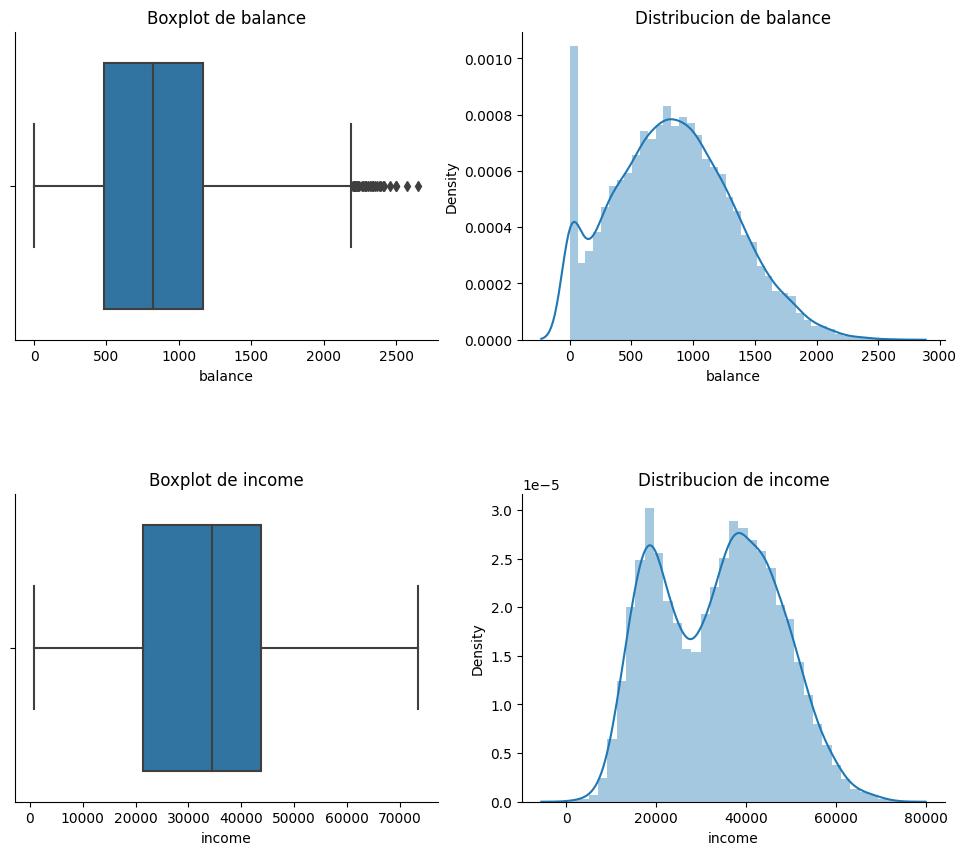

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize = (12,10)) 
plt.subplots_adjust(hspace = .5)
sns.despine()
for i, col in enumerate(df[['balance', 'income']]):
   ax[i][0].set_title('Boxplot de {0}'.format(col), size = 12)
   sns.boxplot(df[col], orient = 'v', ax = ax[i][0])
   ax[i][1].set_title('Distribucion de {0}'.format(col), size = 12)
   sns.distplot(df[col], ax = ax[i][1])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


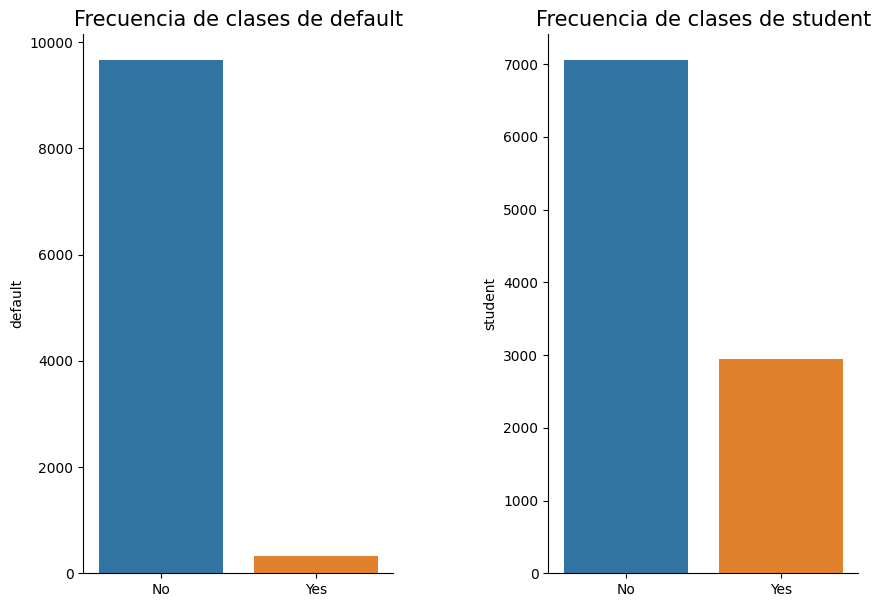

In [6]:
fig, ax = plt.subplots(1,2, figsize = (10,7)) 
plt.subplots_adjust(wspace = .5)
sns.despine()
for i, col in enumerate(df[['default', 'student']]):
   ax[i].set_title('Frecuencia de clases de {0}'.format(col), size = 15)
   sns.barplot(df[col].unique(),df[col].value_counts(), orient = 'v', ax
= ax[i])

In [22]:
df.groupby('default').count()


,student,balance,income
default,,,
0,9667,9667,9667
1,333,333,333


In [24]:
df.groupby('default').count().income.sum()

10000

In [14]:
from sklearn.preprocessing import LabelEncoder
df['default']=LabelEncoder().fit_transform(df['default'])
df['student']=LabelEncoder().fit_transform(df['student'])
df.head(5)

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

X_train,X_test,y_train,y_test= train_test_split(df.loc[:,'student':'income'],df['default'],test_size=0.33, random_state=11238)

LDA_model=LinearDiscriminantAnalysis().fit(X_train,y_train)
y_pred=LDA_model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3186
           1       0.72      0.25      0.38       114

    accuracy                           0.97      3300
   macro avg       0.85      0.63      0.68      3300
weighted avg       0.97      0.97      0.96      3300



In [26]:
prior=[0.6,0.4]
LDA_model_2=LinearDiscriminantAnalysis(priors=prior).fit(X_train,y_train)
y_pred=LDA_model_2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      3186
           1       0.21      0.88      0.34       114

    accuracy                           0.88      3300
   macro avg       0.60      0.88      0.64      3300
weighted avg       0.97      0.88      0.92      3300



In [37]:
from imblearn.over_sampling import SMOTE
over_samp=SMOTE(random_state=11238,sampling_strategy='minority')
X_train_oversamp,y_train_oversamp=over_samp.fit_resample(X_train,y_train)

prior=[0.5,0.5]
LDA_model_oversamp=LinearDiscriminantAnalysis(priors=prior).fit(X_train_oversamp,y_train_oversamp)
y_pred=LDA_model_oversamp.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3186
           1       0.17      0.92      0.29       114

    accuracy                           0.85      3300
   macro avg       0.59      0.88      0.60      3300
weighted avg       0.97      0.85      0.89      3300



In [38]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA_model_oversamp=QuadraticDiscriminantAnalysis().fit(X_train_oversamp,y_train_oversamp)
y_pred=QDA_model_oversamp.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      3186
           1       0.20      0.89      0.32       114

    accuracy                           0.87      3300
   macro avg       0.60      0.88      0.63      3300
weighted avg       0.97      0.87      0.91      3300

